<a href="https://colab.research.google.com/github/lblum95/AML/blob/master/task2/Jannik_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive')

Mounted at /content/drive


In [2]:
%matplotlib inline 

In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import umap
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [4]:
x_train = pd.read_csv("data/X_train.csv",index_col=0,header = 0)
y_train = pd.read_csv("data/y_train.csv",index_col=0,header = 0)
x_test = pd.read_csv("data/X_test.csv",index_col=0,header = 0)

In [5]:
y_first=y_train['y'].replace(2,0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

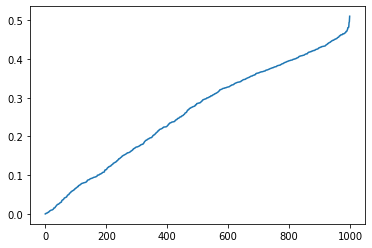

In [6]:
from scipy import stats
p=[]
for i in range(x_train.shape[1]):
  p.append(abs(stats.pearsonr(x_train[:,i], y_first)[0]))
p.sort()
plt.plot(p)
plt.show()

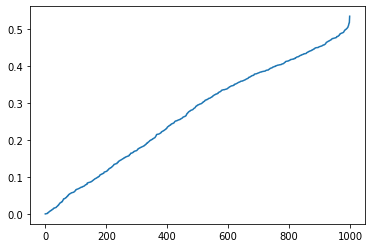

In [8]:
p=[]
for i in range(x_train.shape[1]):
  p.append(abs(stats.spearmanr(x_train[:,i], y_first)[0]))
p.sort()
plt.plot(p)
plt.show()

In [9]:
q=[value for value in p if value>0.45]
len(q)

106

In [10]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [11]:
kbest = SelectKBest(f_classif,k=106).fit(x_train,y_first)
X_train = kbest.transform(x_train)
X_test = kbest.transform(x_test)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_first, test_size=0.2, random_state=36)

In [ ]:
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10, 100]}
svc = SVC(class_weight='balanced',decision_function_shape='ovo', random_state=36)
clf = GridSearchCV(estimator=svc, param_grid=parameters, scoring='balanced_accuracy',return_train_score=True)
clf.fit(X_train, y_train)
print(clf.best_params_)
plot_confusion_matrix(clf, X_val, y_val)
plt.show() 

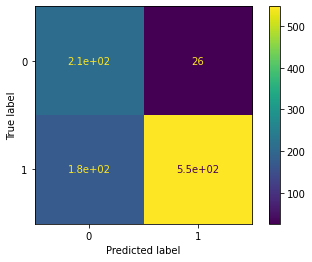

{'C': 1, 'kernel': 'rbf'}

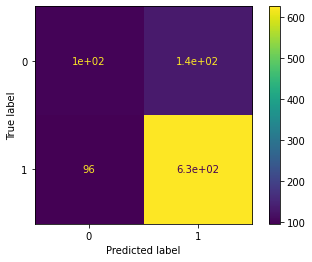

In [21]:

tree = DecisionTreeClassifier(class_weight='balanced', random_state=36)
tree.fit(X_train, y_train)
plot_confusion_matrix(tree, X_val, y_val)
plt.show() 

In [22]:
tree.score(X_val,y_val)

0.759375

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
parameters = {'n_neighbors':[1, 3, 5]}
neigh = KNeighborsClassifier(n_neighbors=3)
clf = GridSearchCV(estimator=neigh, param_grid=parameters, scoring='balanced_accuracy',return_train_score=True)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'n_neighbors': 5}


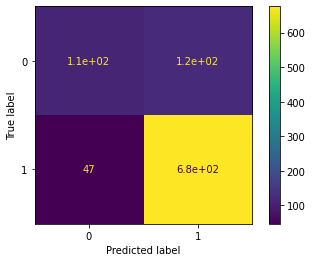

In [34]:
plot_confusion_matrix(clf, X_val, y_val)  # doctest: +SKIP
plt.show() 